In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

import util

# Load data

In [2]:
ecog = util.loadPD()
Fs, t, S, Sdy, flo, fhi = util.loadmeta()

# Compute sharpness ratio and PAC

In [3]:
widthS = 5 # hyperparameter for calculating sharpness

pks, trs, pksharp, trsharp, esrs, \
peaktotrough, risteep, desteep, rdsrs, \
risetodecay = util.measure_shape(ecog, widthS=widthS)

In [4]:
pac = util.measure_pac(ecog, flo, fhi)

In [5]:
comodkwargs = {}
pac_comod1 = util.calculate_comodulogramPAC(ecog, comodkwargs=comodkwargs)

In [6]:
comodkwargs = {'w_lo':5, 'w_hi':5}
pac_comod2 = util.calculate_comodulogramPAC(ecog, comodkwargs=comodkwargs)

In [7]:
comodkwargs = {'w_lo':3, 'w_hi':3}
pac_comod3 = util.calculate_comodulogramPAC(ecog, comodkwargs=comodkwargs)

# Compare PAC values

DBS off correlation: r=0.92, p<10^-9
DBS on  correlation: r=0.88, p<10^-7


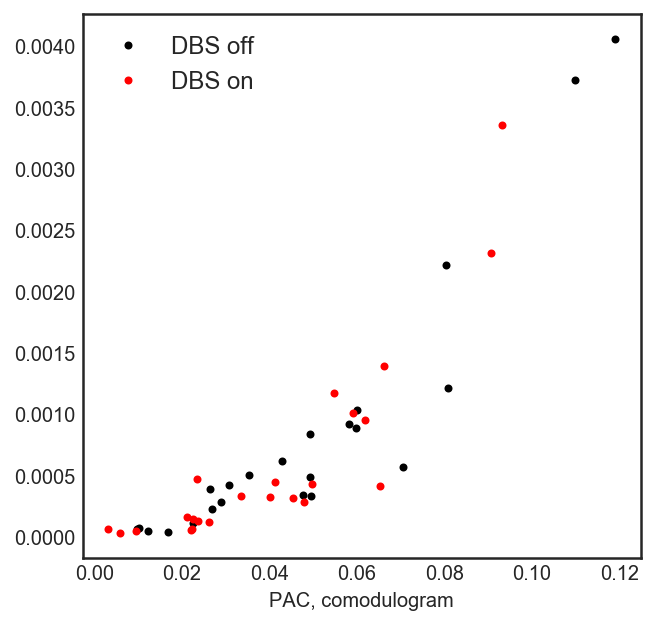

In [10]:
plt.figure(figsize=(5,5))
plt.plot(pac['B'], pac_comod1['B'], 'k.', label='DBS off')
plt.plot(pac['D'], pac_comod1['D'], 'r.', label='DBS on')
plt.legend(loc='best', fontsize=12)
plt.xlabel('PAC, broadband')
plt.xlabel('PAC, comodulogram')

roff, poff = stats.spearmanr(pac['B'], pac_comod1['B'])
ron, pon = stats.spearmanr(pac['D'], pac_comod1['D'])
print('DBS off correlation: r={:.2f}, p<10^{:d}'.format(roff, int(np.ceil(np.log10(poff)))))
print('DBS on  correlation: r={:.2f}, p<10^{:d}'.format(ron, int(np.ceil(np.log10(pon)))))

DBS off correlation: r=0.95, p<10^-11
DBS on  correlation: r=0.94, p<10^-10
DBS off correlation: r=0.95, p<10^-11
DBS on  correlation: r=0.95, p<10^-11


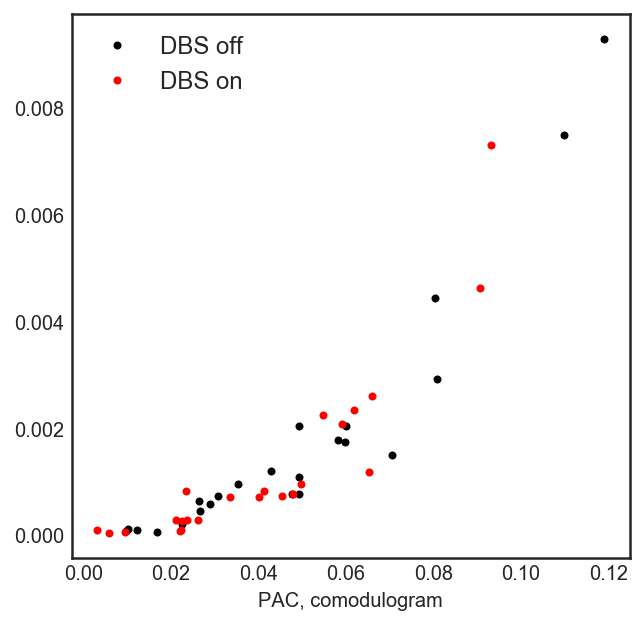

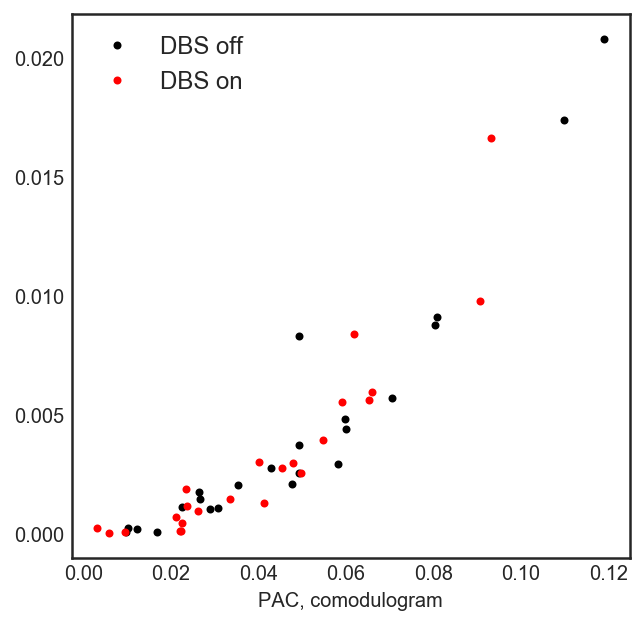

In [11]:
plt.figure(figsize=(5,5))
plt.plot(pac['B'], pac_comod2['B'], 'k.', label='DBS off')
plt.plot(pac['D'], pac_comod2['D'], 'r.', label='DBS on')
plt.legend(loc='best', fontsize=12)
plt.xlabel('PAC, broadband')
plt.xlabel('PAC, comodulogram')

roff, poff = stats.spearmanr(pac['B'], pac_comod2['B'])
ron, pon = stats.spearmanr(pac['D'], pac_comod2['D'])
print('DBS off correlation: r={:.2f}, p<10^{:d}'.format(roff, int(np.ceil(np.log10(poff)))))
print('DBS on  correlation: r={:.2f}, p<10^{:d}'.format(ron, int(np.ceil(np.log10(pon)))))

plt.figure(figsize=(5,5))
plt.plot(pac['B'], pac_comod3['B'], 'k.', label='DBS off')
plt.plot(pac['D'], pac_comod3['D'], 'r.', label='DBS on')
plt.legend(loc='best', fontsize=12)
plt.xlabel('PAC, broadband')
plt.xlabel('PAC, comodulogram')

roff, poff = stats.spearmanr(pac['B'], pac_comod3['B'])
ron, pon = stats.spearmanr(pac['D'], pac_comod3['D'])
print('DBS off correlation: r={:.2f}, p<10^{:d}'.format(roff, int(np.ceil(np.log10(poff)))))
print('DBS on  correlation: r={:.2f}, p<10^{:d}'.format(ron, int(np.ceil(np.log10(pon)))))

# Compare both PACs to sharpness ratio

Broadband PAC-ESR DBS off correlation: r=0.89, p<10^-7
Broadband PAC-ESR DBS on  correlation: r=0.87, p<10^-7
Comodulogram PAC-ESR DBS off correlation: r=0.88, p<10^-7
Comodulogram PAC-ESR DBS on  correlation: r=0.71, p<10^-3


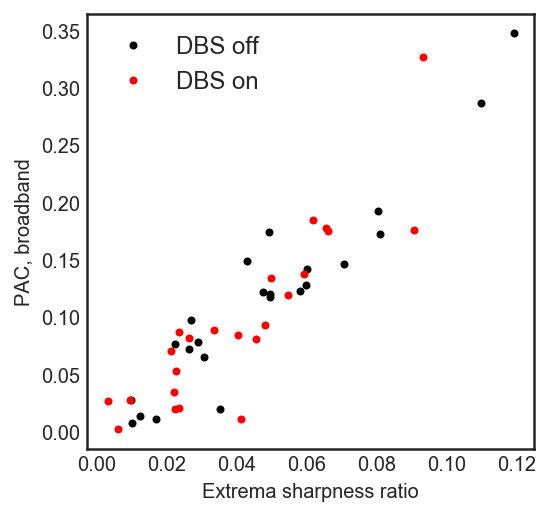

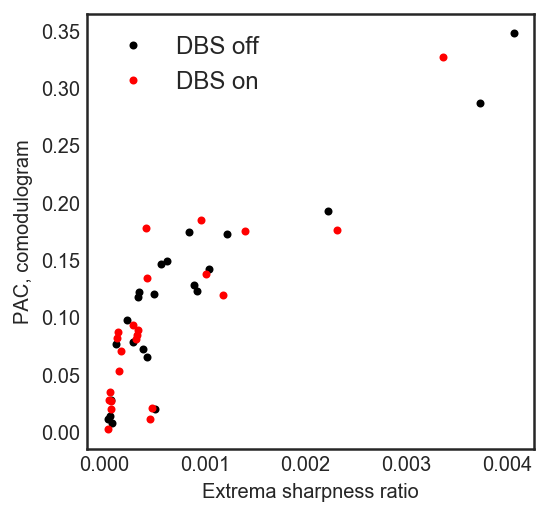

In [12]:
plt.figure(figsize=(4, 4))
plt.plot(pac['B'], esrs['B'], 'k.', label='DBS off')
plt.plot(pac['D'], esrs['D'], 'r.', label='DBS on')
plt.legend(loc='best', fontsize=12)
plt.ylabel('PAC, broadband')
plt.xlabel('Extrema sharpness ratio')

roff, poff = stats.spearmanr(pac['B'], esrs['B'])
ron, pon = stats.spearmanr(pac['D'], esrs['D'])
print('Broadband PAC-ESR DBS off correlation: r={:.2f}, p<10^{:d}'.format(roff, int(np.ceil(np.log10(poff)))))
print('Broadband PAC-ESR DBS on  correlation: r={:.2f}, p<10^{:d}'.format(ron, int(np.ceil(np.log10(pon)))))


plt.figure(figsize=(4, 4))
plt.plot(pac_comod1['B'], esrs['B'], 'k.', label='DBS off')
plt.plot(pac_comod1['D'], esrs['D'], 'r.', label='DBS on')
plt.legend(loc='best', fontsize=12)
plt.ylabel('PAC, comodulogram')
plt.xlabel('Extrema sharpness ratio')

roff, poff = stats.spearmanr(pac_comod1['B'], esrs['B'])
ron, pon = stats.spearmanr(pac_comod1['D'], esrs['D'])
print('Comodulogram PAC-ESR DBS off correlation: r={:.2f}, p<10^{:d}'.format(roff, int(np.ceil(np.log10(poff)))))
print('Comodulogram PAC-ESR DBS on  correlation: r={:.2f}, p<10^{:d}'.format(ron, int(np.ceil(np.log10(pon)))))
